<a href="https://colab.research.google.com/github/stephintoto/ICT-ASSIGNMENTS/blob/main/unsup_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/force2020_data.csv')

In [3]:
df.head(10)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
5,1.879687,72.014420,495.288,NaN,43.657482,160.149292
6,1.878731,72.588089,495.440,NaN,42.236221,161.250381
7,1.867837,71.283051,495.592,NaN,39.933563,162.214416
8,1.847233,69.721436,495.744,NaN,39.163223,161.575104
9,1.836309,66.677727,495.896,NaN,37.802933,160.583359


In [4]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [5]:
df.drop('NPHI', axis=1, inplace=True)
df.drop('PEF', axis=1, inplace=True)

In [8]:
df['DTC'].fillna(df['DTC'].mean())

,DTC
0,161.131180
1,160.603470
2,160.173615
3,160.149429
4,160.128342
...,...
18265,141.300461
18266,141.300461
18267,141.300461
18268,141.300461


In [9]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
DTC,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


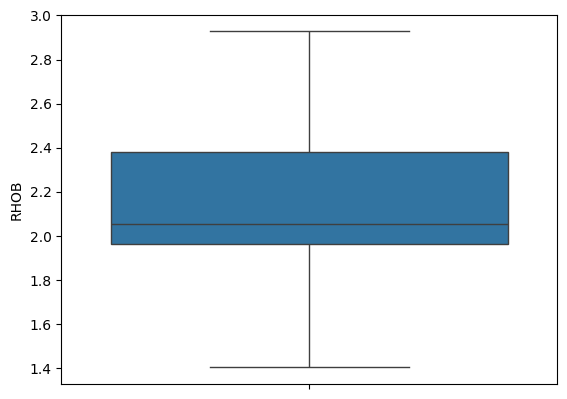

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


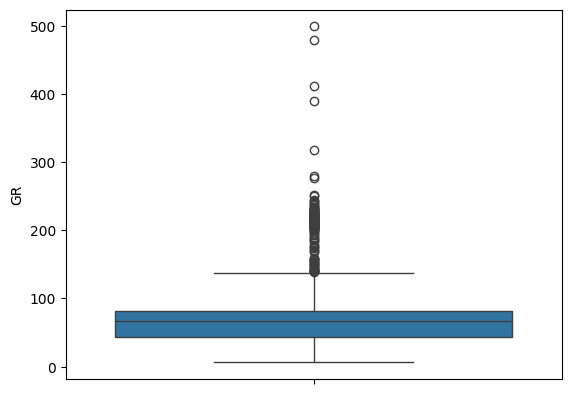

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


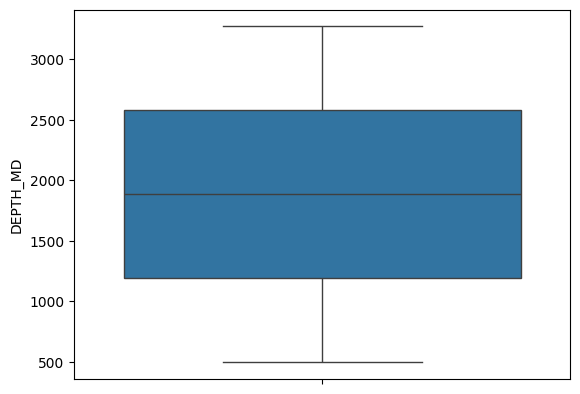

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


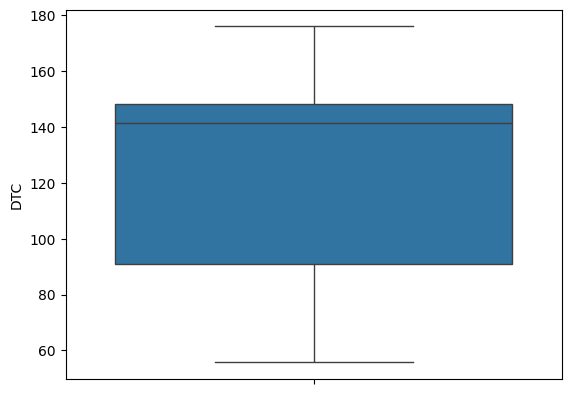

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    sns.boxplot(df[column])
    plt.show()

In [12]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df=df[~((df<(lower))|(df>(upper))).any(axis=1)]
outliers=df[(df<(lower))|(df>(upper))].count()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


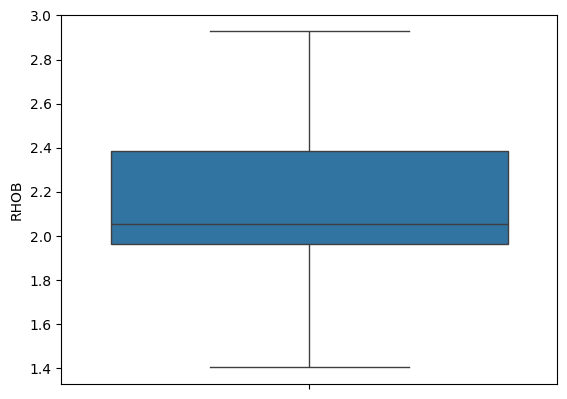

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


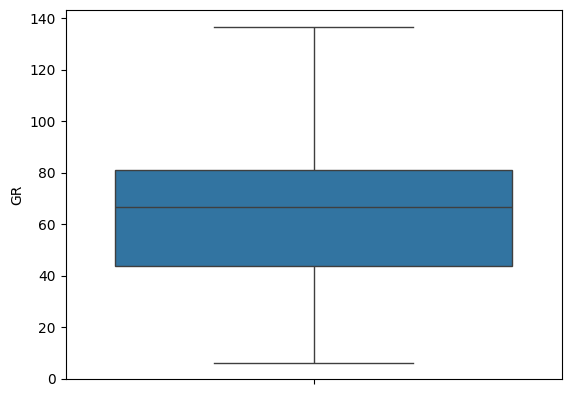

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


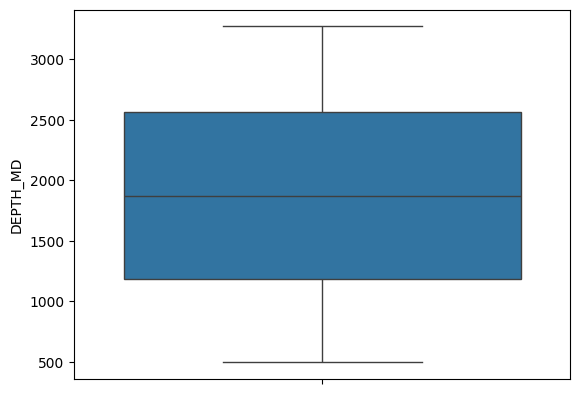

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


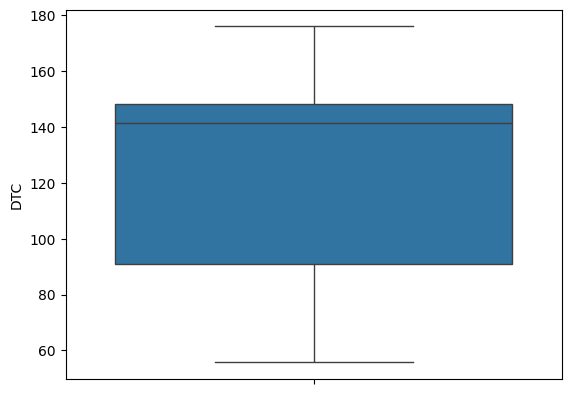

In [14]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    sns.boxplot(df[column])
    plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [16]:
df_scaled = pd.DataFrame(x_scaled, columns=df.columns)
df_scaled.head()

,RHOB,GR,DEPTH_MD,DTC
0,-0.754215,0.688384,-1.724850,1.171806
1,-0.735410,0.651385,-1.724661,1.154598
2,-0.712844,0.476211,-1.724471,1.140582
3,-0.728303,0.399565,-1.724281,1.139793
4,-0.768137,0.354211,-1.724092,1.139106


In [18]:


from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
kmeans_labels = kmeans.fit_predict(df_scaled)

# Evaluate KMeans
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, kmeans_labels)
print(f"KMeans Score: {kmeans_silhouette}")



# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Evaluate DBSCAN
if len(set(dbscan_labels)) > 1:
  dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
  dbscan_davies_bouldin = davies_bouldin_score(df_scaled, dbscan_labels)
  print(f"DBSCAN Score: {dbscan_silhouette}")

else:
  print("DBSCAN did not find enough clusters for evaluation.")


# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  #
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Evaluate Hierarchical Clustering
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(df_scaled, hierarchical_labels)
print(f"Hierarchicl Score: {hierarchical_silhouette}")




KMeans Score: 0.4293949094164991
DBSCAN Score: -0.16236014937347262
Hierarchicl Score: 0.5648415663684275


Heirachical clusterin is the best.

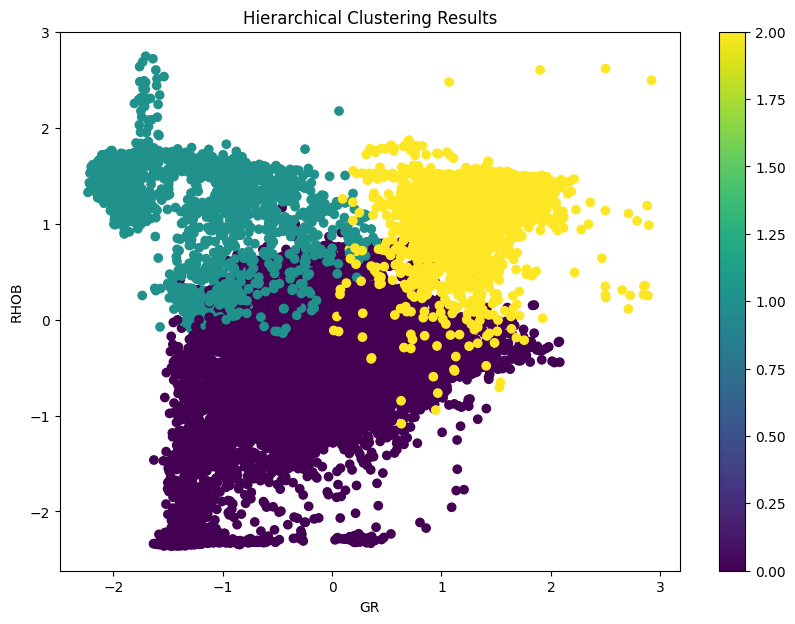

In [19]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled['GR'], df_scaled['RHOB'], c=hierarchical_labels, cmap='viridis')
plt.xlabel('GR')
plt.ylabel('RHOB')
plt.title('Hierarchical Clustering Results')
plt.colorbar()
plt.show()
